## Ping-Pong Aktivität

![ping-pong](images/pingpong.png)

Das Ping-Pong Spiel behandelt eine koordinative, kooperative, rhythmische AufgabensteIlung, welche mit Gruppen von 4 bis 26 Schülerinnen und Schülern durchgeführt werden kann. 

Cslovjecsek, M., Guggisberg, M. & Linneweber-Lammerskitten H. (2011). Mathe macht Musik Ping-Pong: Ein arithmetisch-musikalisches Gruppenspiel, PM Praxis der Mathematik 42 (pp. 13 – 18). 

### Spielregeln:
- Die ganze Klasse sitzt im Kreis. In einem gemächlichen Tempo klatschen dazu alle gemeinsam abwechselnd in die Hände und auf die Knie.
- Dazu wird der Reihe nach fortlaufend gezählt (1,2, 3, 4 ...).
- In einem ersten Schritt werden alle Dreier-Zahlen (3, 6, 9, 12, 15 ...) mit dem Wort "Ping" ersetzt. 
- Analog werden dann die Vierer-Zahlen (4, 8, 12, 16 .. .) mit ,,Pong" ersetzt.
- Nach einigem Üben kann versucht werden, die Dreier- und Vierer-Zahlen gleichzeitig zu ersetzen (12, 24 .. . heißt dann Ping-Pong ).
- Viel Übung ist erforderlich, wenn bei Ping und Pong als zusätzliche Regel ein Richtungswechsel vorgenommen wird, bei Ping-Pong (12, 24, ...) die Richtung aber beibehalten wird.

![pinpongspiel](images/PingPongSpiel.gif)

### Bei welcher Zahl komme ich an die Reihe ?

### Wie sieht der Spielplan aus ?

### Mathematische Beschreibung
$\mathbb{R} \times \mathbb{R} \times \mathbb{R} \to \mathbb{R}$

$(n, \mbox{Ping-Zahl}, \mbox{Pong-Zahl}) \mapsto \mbox{Spielposition}$






![pingpongkreis](images/pingpongnummer.png)

#### Pseudo-Code Ping-Pong zur Berechnung der Spielposition

    p = 0
    step = 1
    for i : 1 .. N do
        p = p + step
        if (i mod ping) xor (i mod pong)
            step = (-1)* step
    return p


#### Python Source Code

In [21]:
def pingpong(n, ping=3, pong=4):
    p = 0
    step = 1
    for i in range(1,n+1):
        p = p + step
        if bool(i%ping)^bool(i%pong):
            step *= (-1)
    return p

pingpong(23)

-1

## Berechnung der ersten 30 Spielpositionen

In [22]:
y = [pingpong(n) for n in range(1,31)]
print y

[1, 2, 3, 2, 3, 4, 3, 2, 3, 2, 1, 0, -1, -2, -3, -2, -3, -4, -3, -2, -3, -2, -1, 0, 1, 2, 3, 2, 3, 4]


### Visualisierung des Spielverlaufs mithilfe eines Nummer-Position-Diagramms

In [23]:
%matplotlib inline
from matplotlib.pyplot import *
def init_plot():
    fig = figure(figsize=(12, 6))
    yticks(size=16)
    xticks(size=16)
    xlabel('Nummer',fontsize=16)
    ylabel('Position',fontsize=16)
    

'Spielverlauf ping=3 , pong=4'

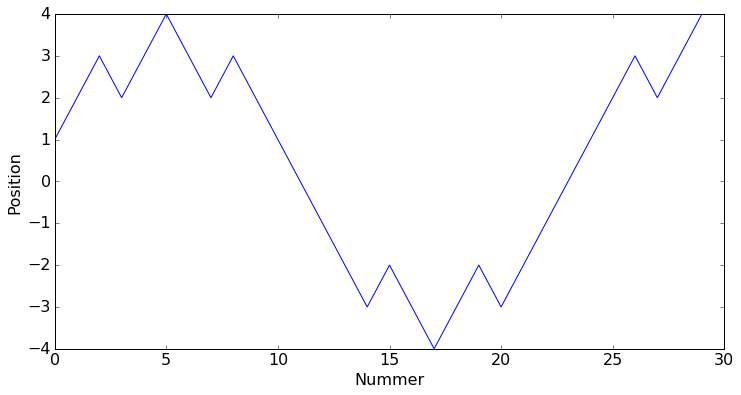

In [24]:
init_plot()
plot(y)
'Spielverlauf ping=3 , pong=4'

## Abhängigkeiten zwischen Ping- und Pong-Zahlen 

'Spielverlauf ping=3 , pong=5'

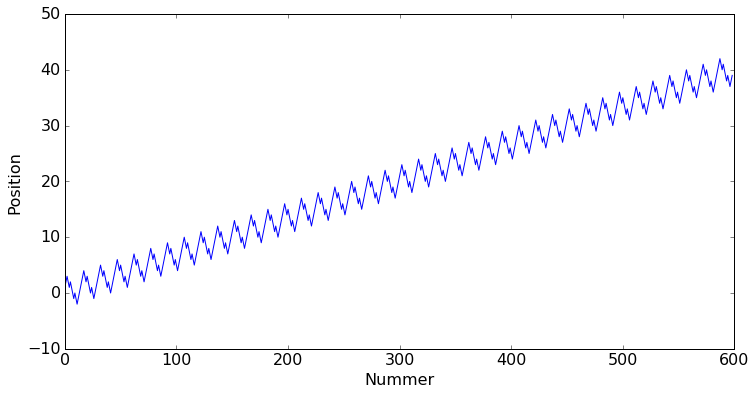

In [25]:
ping = 3
pong = 5
y = [pingpong(n,ping,pong) for n in range(1,600)]
init_plot()
plot(y)
'Spielverlauf ping=%d , pong=%d' %(ping,pong)

### Weitere divergente Konfigurationen

'Spiele (ping=3,pong=5),(ping=3,pong=7),(ping=3,pong=9),(ping=3,pong=11)'

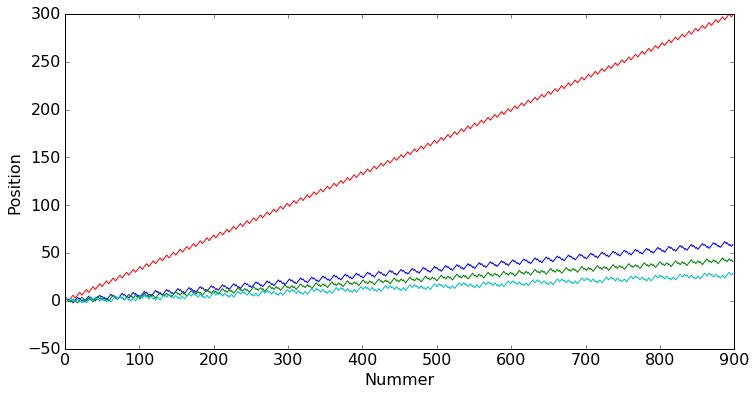

In [26]:
ping = 3
y = [[pingpong(n,ping,pong) for pong in range(5,12,2)] for n in range(1,900) ]
init_plot()
plot(y)
#legend(('ping=3,pong=5','ping=3,pong=7','ping=3,pong=9','ping=3,pong=11'))
'Spiele (ping=3,pong=5),(ping=3,pong=7),(ping=3,pong=9),(ping=3,pong=11)'


## 6 Perioden

'Spielverlauf ping=23 , pong=25'

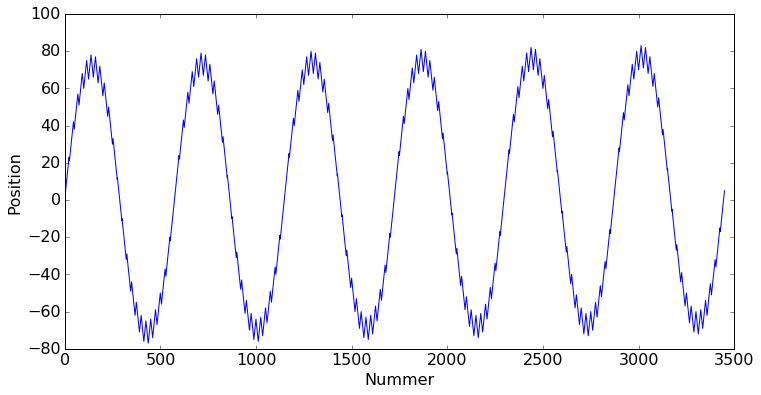

In [27]:
ping=23
pong=25
init_plot()
y = [pingpong(n,ping,pong) for n in range(1,6*ping*pong)]
plot(y)
'Spielverlauf ping=%d , pong=%d' %(ping,pong)

### Ping-Pong Parameter Karte

In [28]:
def plot_maps(zmin,zmax):
    n_col = 4
    n_row = 6
    dn = 50
    figure(figsize=(2.6 * n_col, 2.6 * n_row))
    subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(1,n_row * n_col+1):
        subplot(n_row, n_col, i)
        title(int(i*dn))
        imshow( [[pingpong(i*dn,k,l) for l in range(2,41)] for k in range(2,41)],vmin=zmin,vmax=zmax)
    colorbar()

""

''

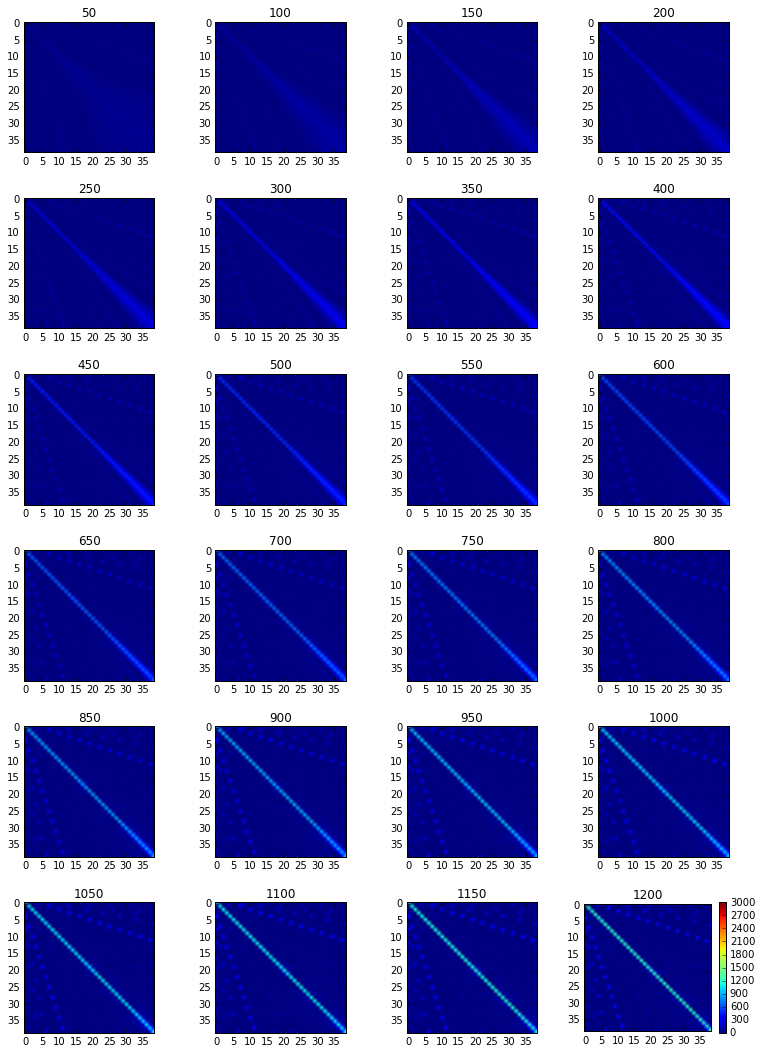

In [29]:
plot_maps(0,3000)

In [30]:
import numpy as np

def plot_map_n_12347(zmin,zmax):
    ymap = [[pingpong(12347,k,l) for l in range(2,41)] for k in range(2,41)]
    fig = figure(figsize=(12, 8))
    xticks(np.arange(0,40,5),np.arange(2,40,5),size=16)
    yticks(np.arange(0,40,5),np.arange(2,40,5),size=16)
    imshow(ymap,interpolation="nearest",vmin=zmin,vmax=zmax);
    colorbar()
    'Parameter Karte ping = 2..40 , pong = 2..40'
    

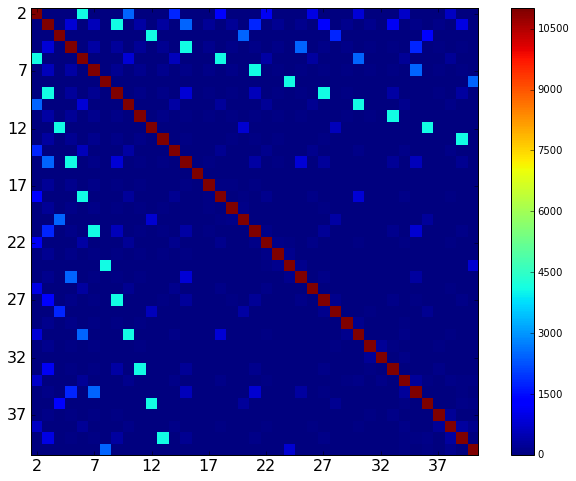

In [31]:
plot_map_n_12347(0,11000)

Diese Karte zeigt, dass die Fälle, wenn ping ist ein Teiler von pong die Folge rasch divergiert. 

## Nur Fälle berücksichtigen die oszillieren (keine Divergenz)

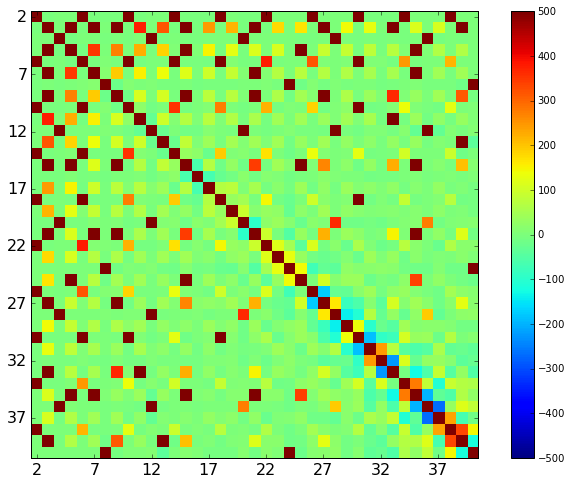

In [32]:
plot_map_n_12347(-500,500)

### Betrachtung spannender Fälle entlang der Diagonalen
(39,40) , (39,38) , (39,36) 
(37,40) , (37,38) , (37,36)
(35,40) , (37,38) , (37,36)


'Spielverlauf (35,36) , (35,38) , (35,40) , (37,36) , (37,38) , (37,40), (39,36) , (39,38) , (39,40)'

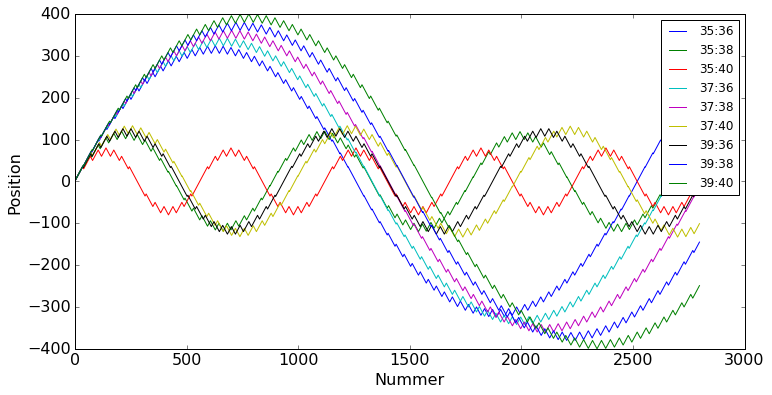

In [33]:
init_plot()
legend((('p33:40', 'p35:40', 'p37:40', 'p39:40')))
y = [[pingpong(n,ping,pong) for ping in range(35,41,2) for pong in range(36,41,2)] for n in range(1,2800) ]
leg= [str(str(ping)+':'+str(pong)) for ping in range(35,41,2) for pong in range(36,41,2)]
plot(y)
legend(tuple(leg))
'Spielverlauf (35,36) , (35,38) , (35,40) , (37,36) , (37,38) , (37,40), (39,36) , (39,38) , (39,40)'

### Kombinationen von ungeraden und geraden teilerfremden Paare scheinen periodisch zu sein

Mit einer Periodizität von $ \cdot ping \cdot pong $

Und einer Amplitude von $ \approx \frac{32}{125} \cdot ping \cdot pong $

'Spielverlauf ping=41 , pong=42'

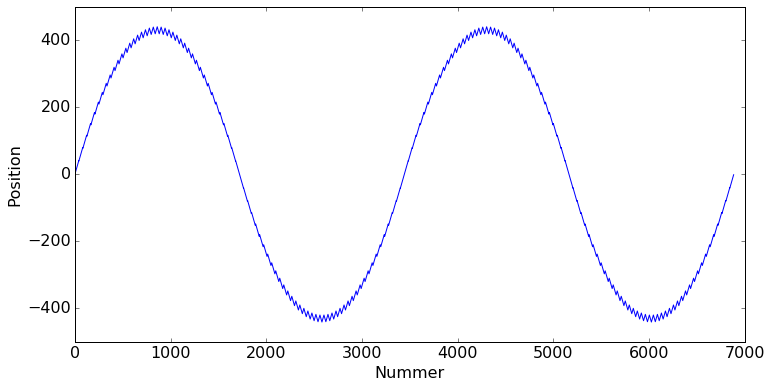

In [34]:
ping = 41
pong = 42 #Torsten
init_plot()
y = [pingpong(n,ping,pong) for n in range(1,4*ping*pong) ]
plot(y)

'Spielverlauf ping=%d , pong=%d' %(ping,pong)



### Vergleich einer normalisierten Ping-Pong Kurve mit einer Sinus Funktion

'Vergleich f(x)=sin(x) und normalisierter Spielverlauf ping=41 , pong=42'

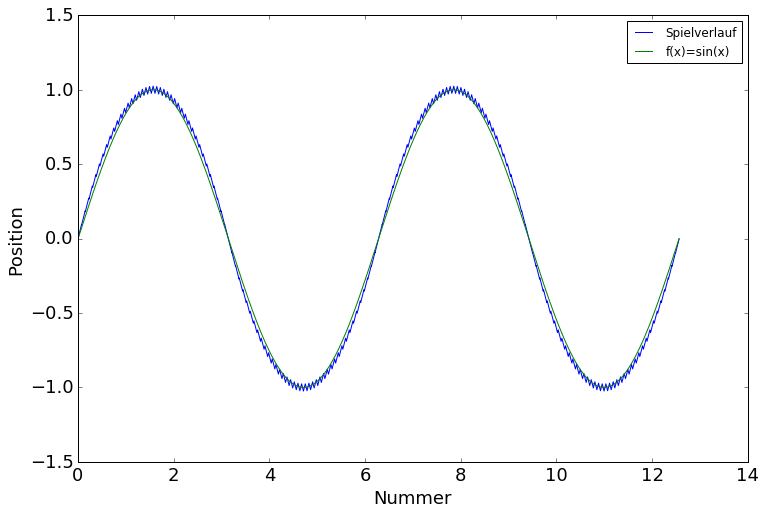

In [35]:
import numpy as np
from math import pi
ping = 41
pong = 42 #Torsten

fig = figure(figsize=(12, 8))
yticks(size=18)
xticks(size=18)
xlabel('Nummer',fontsize=18)
ylabel('Position',fontsize=18)

Amplitude = 32.0 / 125 * ping *ping

x = np.linspace(0,4*pi,4*ping*pong-1)
y = np.array([pingpong(n,ping,pong)/Amplitude for n in range(1,4*ping*pong) ])
y2 = np.sin(x)
plot(x,y,'-',x,y2,'-')
legend(('Spielverlauf','f(x)=sin(x)'))

'Vergleich f(x)=sin(x) und normalisierter Spielverlauf ping=41 , pong=42'

In [36]:
## nur fälle mit ggT = 1
from fractions import gcd
def pingpong2(n, ping=3, pong=4):
    if gcd(ping,pong) != 1:
        return -1
    p = 0
    step = 1
    for i in range(1,n+1):
        p = p + step
        if bool(i%ping)^bool(i%pong):
            step *= (-1)
    return p

'Parameter Karte ping = 2..40 , pong = 2..40'

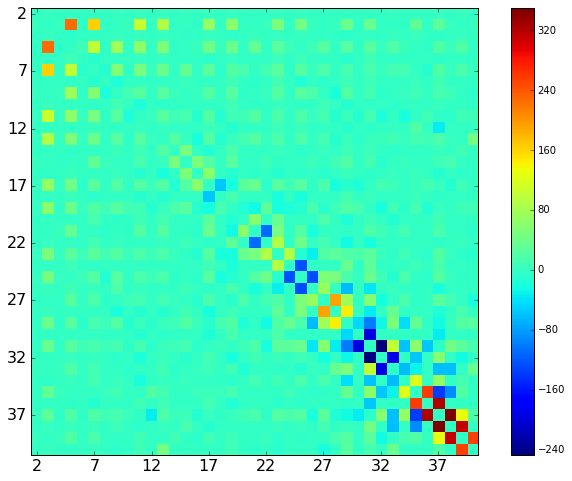

In [37]:
ymap = [[pingpong2(3433,k,l) for l in range(2,41)] for k in range(2,41)]

fig = figure(figsize=(12, 8))
xticks(np.arange(0,40,5),np.arange(2,40,5),size=16)
yticks(np.arange(0,40,5),np.arange(2,40,5),size=16)
imshow(ymap,interpolation="nearest");
colorbar()
'Parameter Karte ping = 2..40 , pong = 2..40'

## die Karte zeigt,  dass es weitere divergente Fälle gibt.

Weitere Untersuchungen zeigen, dass ping,pong Zahlenpaare divergieren, wenn beide Zahlen ungerade sind. Die Betrachtung von ausschliesslich geraden und ungeraden Paaren zeigt. 

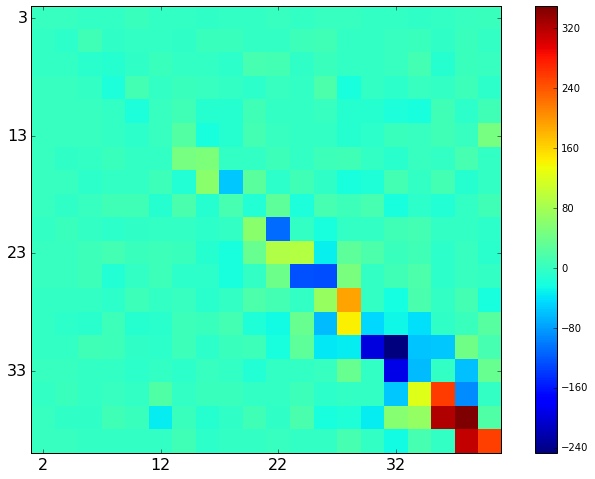

In [38]:
ymap = [[pingpong2(3433,k,l) for l in range(2,41,2)] for k in range(3,41,2)]

fig = figure(figsize=(12, 8))
xticks(np.arange(0,20,5),np.arange(2,40,10),size=16)
yticks(np.arange(0,20,5),np.arange(3,40,10),size=16)

imshow(ymap,interpolation="nearest");
colorbar()